<a href="https://colab.research.google.com/github/dtabuena/Workshop/blob/main/RNA_Workshop/Analyze_BMX_scRNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
!pip install scanpy
import scanpy as sc
import anndata as ad
from tqdm import tqdm
import numpy as np

import urllib
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:

subfolder='/outs/raw_gene_bc_matrices/mm10-1.2.0_premrna/'
parent_folder='//hive.gladstone.internal/Huang-Lab/kzalocus/bumex_snSeq/'
needed_files = ['/barcodes.tsv', '/genes.tsv', '/matrix.mtx']



folder_list = [f.name for f in os.scandir(parent_folder) if f.is_dir()]
folder_list = [f for f in folder_list if "_" in f]
_=[print(f) for f in folder_list if "_" in f]



01_E3Ki3611
02_E3Ki3607
03_E3Ki3608
04_E3Ki3612
05_E3Ki3613
06_E3Ki3614
07_E4Ki2737
08_E4Ki2738
09_E4Ki2739
10_E4Ki2710
11_E4Ki2711
12_E4Ki2712


In [ ]:
f = folder_list[0]
print(f)
f_list = [''.join([parent_folder,f,subfolder,n]) for n in needed_files] #
print(f_list)


01_E3Ki3611
['//hive.gladstone.internal/Huang-Lab/kzalocus/bumex_snSeq/01_E3Ki3611/outs/raw_gene_bc_matrices/mm10-1.2.0_premrna//barcodes.tsv', '//hive.gladstone.internal/Huang-Lab/kzalocus/bumex_snSeq/01_E3Ki3611/outs/raw_gene_bc_matrices/mm10-1.2.0_premrna//genes.tsv', '//hive.gladstone.internal/Huang-Lab/kzalocus/bumex_snSeq/01_E3Ki3611/outs/raw_gene_bc_matrices/mm10-1.2.0_premrna//matrix.mtx']


In [ ]:
dest_folder = 'C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_ReAnalyze_Zalocusky_2021/snBMX/'

for f in folder_list:
    for n in needed_files:
        src = ''.join([parent_folder,f,subfolder,n])
        try:
            print(''.join([dest_folder,f,'/']))
            os.makedirs(''.join([dest_folder,f,'/']))
        except: None
        dst = ''.join([dest_folder,f,n])

        print(src)
        print(dst)



        shutil.copyfile(src, dst)

C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_ReAnalyze_Zalocusky_2021/snBMX/01_E3Ki3611/
//hive.gladstone.internal/Huang-Lab/kzalocus/bumex_snSeq/01_E3Ki3611/outs/raw_gene_bc_matrices/mm10-1.2.0_premrna//barcodes.tsv
C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_ReAnalyze_Zalocusky_2021/snBMX/01_E3Ki3611/barcodes.tsv
C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_ReAnalyze_Zalocusky_2021/snBMX/01_E3Ki3611/
//hive.gladstone.internal/Huang-Lab/kzalocus/bumex_snSeq/01_E3Ki3611/outs/raw_gene_bc_matrices/mm10-1.2.0_premrna//genes.tsv
C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_ReAnalyze_Zalocusky_2021/snBMX/01_E3Ki3611/genes.tsv
C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_ReAnalyze_Zalocusky_2021/snBMX/01_E3Ki3611/
//hive.gladstone.internal/Huang-Lab/kzalocus/bumex_snSeq/01_E3Ki3611/outs/raw_gene_bc_matrices/mm10-1.2.0_premrna//matrix.mtx
C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_ReAnalyze_Zalocusky_2021/snBMX/01_E3Ki3611/m

In [ ]:
source = 'C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_ReAnalyze_Zalocusky_2021/snBMX/'
os.chdir(source)
folder_list = [f.path for f in os.scandir(source) if f.is_dir() and '_' in f.name]
adata_dict = {}
for f in tqdm(folder_list):
    a = sc.read_10x_mtx(f)
    sample_ID = f.split('/')[-1]
    adata_dict[sample_ID]=a
    a=[]
adata = ad.concat(adata_dict,axis = 0,label="sample",index_unique="_")
display(adata)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [01:09<00:00,  5.82s/it]


AnnData object with n_obs × n_vars = 8847360 × 27998
    obs: 'sample'

pulling gene annotations...
Use local copy of musmus
Filtering...
1527909 cells with >0.25% mt-RNA removed
9255 non coding genes removed


C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\scanpy\preprocessing\_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


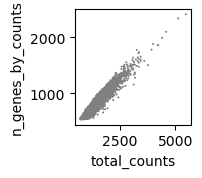

In [ ]:
def pull_gene_annots(csv_loc='./mmusculus_coding_noncoding.csv',
                     my_git='https://raw.githubusercontent.com/dtabuena/Resources/main/Genetics/mmusculus_coding_noncoding.csv',
                     biomart_name='mmusculus',
                     biomart_keys=["ensembl_gene_id", "chromosome_name","transcript_biotype","external_gene_name","peptide"]):


    if os.path.exists('./mmusculus_coding_noncoding.csv'):
        print( 'Use local copy of musmus')
        annot_dd = pd.read_csv('./mmusculus_coding_noncoding.csv').set_index("external_gene_name")
    else:
        try:
            print( 'attempting to pull mus mus from git...')
            musmus_link = 'https://raw.githubusercontent.com/dtabuena/Resources/main/Genetics/mmusculus_coding_noncoding.csv'
            filename = './mmusculus_coding_noncoding.csv'
            urllib.request.urlretrieve(musmus_link, filename)
            annot_dd = pd.read_csv('./mmusculus_coding_noncoding.csv').set_index("external_gene_name")
        except:
            print('attempting to pull mus mus from biomart...')
            annot = sc.queries.biomart_annotations("mmusculus",["ensembl_gene_id", "chromosome_name","transcript_biotype","external_gene_name"],).set_index('ensembl_gene_id')
            uniq_inds = list(set(list(annot.index)))
            for r in tqdm(uniq_inds):
                match_bool = annot.index.str.contains(r)
                if np.sum(match_bool)>1:
                    new_val ='__'.join(list(annot.loc[r,'transcript_biotype']))
                    annot.at[r,'transcript_biotype']=new_val
            annot['is_coding']= annot.transcript_biotype.str.contains('coding')
            annot_dd = annot.drop_duplicates().set_index("external_gene_name")
            annot_dd.to_csv('./mmusculus_coding_noncoding.csv')

    coding_list = annot_dd.index[ annot_dd['is_coding'] ].to_list()
    return coding_list, annot_dd




def preprocess_andata10x(adata_og,pct_mito=0.25,min_genes=500,max_genes=2400,min_counts=500,max_counts=4500):

    print('pulling gene annotations...')
    coding_list, _ = pull_gene_annots()
    adata_og.var['mt'] = adata_og.var_names.str.startswith('mt-')
    adata_og.var['coding'] = [gene in coding_list for gene in adata_og.var_names]
    sc.pp.calculate_qc_metrics(adata_og, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

    adata_QC = adata_og.copy()

    print('Filtering...')
    adata_QC = adata_QC[adata_QC.obs.pct_counts_mt < pct_mito, :]
    print(str(np.sum(adata_og.obs.pct_counts_mt <pct_mito)) + f' cells with >{pct_mito}% mt-RNA removed')
    adata_QC = adata_QC[:, adata_QC.var.coding]
    print(str(np.sum(np.logical_not(adata_og.var.coding))) + ' non coding genes removed')
    sc.pp.filter_cells(adata_QC, min_genes=min_genes)
    sc.pp.filter_cells(adata_QC, max_genes=max_genes)
    sc.pp.filter_cells(adata_QC, min_counts=min_counts)
    sc.pp.filter_cells(adata_QC, max_counts=max_counts)
    fig,ax=plt.subplots(1,figsize=(1.5,1.5))
    sc.pl.scatter(adata_QC, x='total_counts', y='n_genes_by_counts',ax=ax)

    return adata_QC,adata_og

adata_QC = preprocess_andata10x(adata)[0]